In [1]:
import pickle
import numpy as np
import pandas as pd
import time
import seaborn as sns
#for displaying plots
from matplotlib import pyplot as plt
%matplotlib inline

#for ignoring errors in distplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_data(filepath):
    # Load the data into a pandas DataFrame
    data = pd.read_csv(filepath, sep='\t')  # Assuming tab-separated values
    return data

In [5]:
df_crispr = load_data("/content/drive/MyDrive/Colab Notebooks/Thesis/data/crispr_gene_fingerprint_cgp.txt")


In [6]:
df_crispr.shape

(3115, 1299)

**Methalytion Data**

In [74]:
df_meth = load_data("/content/drive/MyDrive/Colab Notebooks/Thesis/data/tcga_meth_data_paired_with_ccl.txt")


In [ ]:
df_meth.head()

,Probe,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-05-4244-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
0,cg00000292,0.3143,0.7453,0.5405,0.5654,0.8840,0.8979,0.5206,0.6955,0.6542,...,0.9317,0.5812,0.6745,0.7580,0.8163,0.6648,0.7203,0.7719,0.8107,0.6890
1,cg00005847,0.6619,0.1455,0.7878,0.8148,0.5816,0.6541,0.3667,0.5829,0.4583,...,0.0460,0.5277,0.4512,0.2959,0.0772,0.0849,0.5069,0.1915,0.4157,0.5366
2,cg00008493,0.9447,0.9298,0.9327,0.9325,0.9318,0.9317,0.9321,0.8699,0.9503,...,0.8959,0.9284,0.9515,0.9269,0.9202,0.8811,0.9427,0.9275,0.9484,0.9303
3,cg00013618,0.8994,0.6277,0.7736,0.8067,0.8568,0.7509,0.8256,0.5659,0.6097,...,0.7477,0.5813,0.7762,0.8949,0.8668,0.6366,0.9207,0.9379,0.7567,0.8138
4,cg00015770,0.0611,0.1388,0.5370,0.1394,0.6929,0.7496,0.2811,0.2775,0.6959,...,0.1198,0.4007,0.6550,0.1694,0.0707,0.0855,0.0747,0.1451,0.1292,0.4839


In [ ]:
df_meth['Probe'].nunique()

6617

In [ ]:
df_meth.shape

(6617, 8239)

In [ ]:
# Checking Null Values
df_meth.isnull().sum()

,0
Probe,0
TCGA-02-0047-01,0
TCGA-02-0055-01,0
TCGA-02-2483-01,0
TCGA-02-2485-01,0
TCGA-05-4244-01,0
TCGA-05-4250-01,0
TCGA-05-4382-01,0
TCGA-05-4384-01,0
TCGA-05-4389-01,0


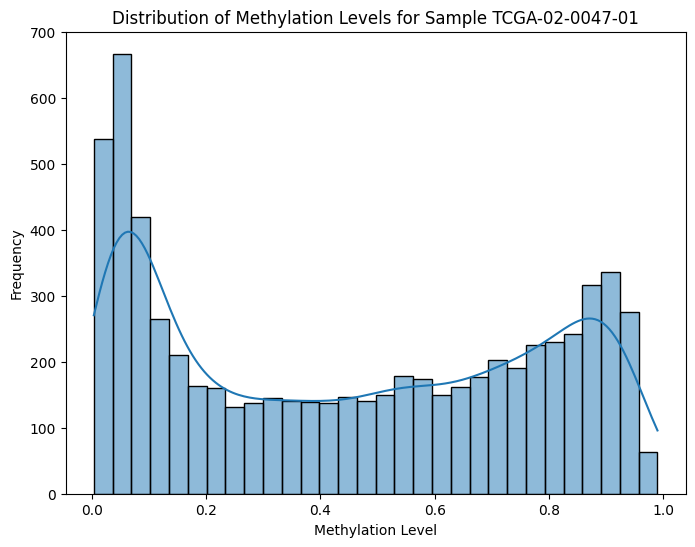

In [ ]:
# Histogram for a specific sample
plt.figure(figsize=(8, 6))
sns.histplot(df_meth['TCGA-02-0047-01'], bins=30, kde=True)
plt.title('Distribution of Methylation Levels for Sample TCGA-02-0047-01')
plt.xlabel('Methylation Level')
plt.ylabel('Frequency')
plt.show()

Perform PCA to reduce dimensionality and visualize the major sources of variation in the dataset.


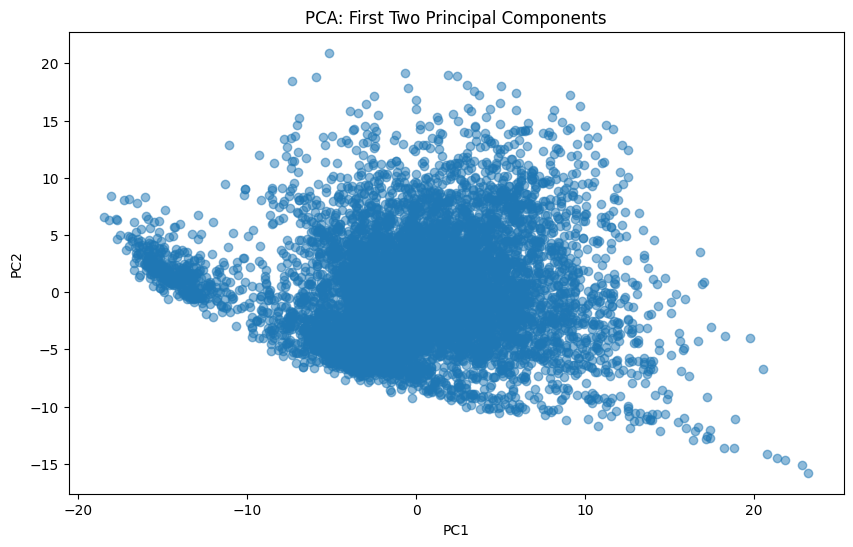

In [ ]:
from sklearn.decomposition import PCA

X = df_meth.iloc[:, 1:].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.T)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.show()

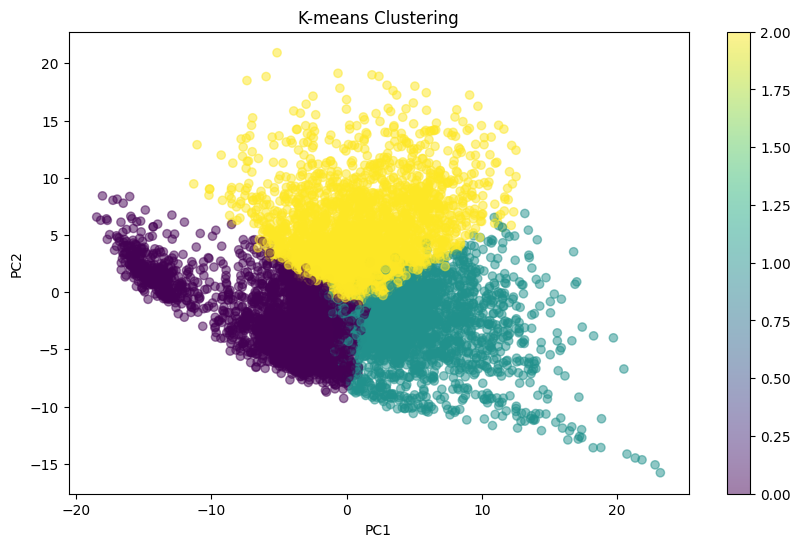

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X.T)
clusters = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()


In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_meth.iloc[:, 1:], cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Methylation Levels')
plt.xlabel('Samples')
plt.ylabel('Probes')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Correlation Heatmap**


In [75]:
df_meth.drop(columns='Probe', inplace = True) # Droping Area column


In [82]:
correlationMatrix = df_meth.corr(method='spearman')
threshold = 0.8

upper_triangle = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

df_reduced = df_meth.drop(columns=to_drop)

print("Remaining Features:\n", df_reduced.columns)

Remaining Features:
 Index(['TCGA-02-0047-01', 'TCGA-02-2485-01', 'TCGA-05-4244-01',
       'TCGA-06-2569-01', 'TCGA-10-0934-01', 'TCGA-24-1431-01',
       'TCGA-2H-A9GF-01', 'TCGA-2L-AAQM-01', 'TCGA-2W-A8YY-01',
       'TCGA-2Y-A9GU-01',
       ...
       'TCGA-W3-AA1V-06', 'TCGA-X6-A8C4-01', 'TCGA-XF-A8HB-01',
       'TCGA-XF-A8HG-01', 'TCGA-XF-A9ST-01', 'TCGA-XF-AAMX-01',
       'TCGA-XF-AAN7-01', 'TCGA-YF-AA3L-01', 'TCGA-ZF-A9R9-01',
       'TCGA-ZF-AA5N-01'],
      dtype='object', length=171)


In [83]:
df_reduced.to_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/data/tcga_meth_data_paired_with_ccl_.txt', sep='\t', index=False)


In [76]:
selected_columns = df_meth.columns[:20]
df_subset = df_meth[selected_columns]


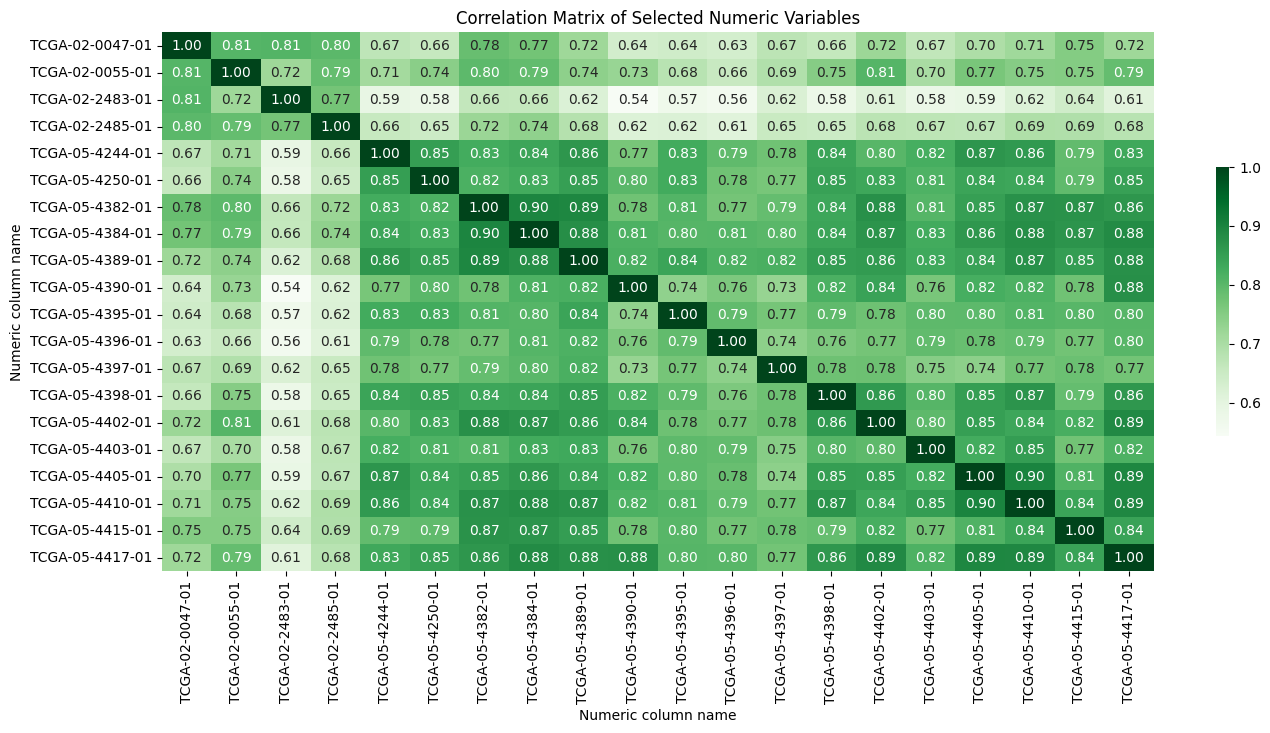

In [77]:
correlationMatrix = df_subset.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(16, 7))
plt.title('Correlation Matrix of Selected Numeric Variables')
sns.heatmap(correlationMatrix, cmap="Greens", annot=True, fmt='.2f', cbar_kws={"shrink": .5})
plt.xlabel('Numeric column name')
plt.ylabel('Numeric column name')
plt.show()

In [78]:
# Print the correlation matrix
print("Correlation Matrix:\n", correlationMatrix)

Correlation Matrix:
                  TCGA-02-0047-01  TCGA-02-0055-01  TCGA-02-2483-01  \
TCGA-02-0047-01         1.000000         0.806528         0.807297   
TCGA-02-0055-01         0.806528         1.000000         0.717041   
TCGA-02-2483-01         0.807297         0.717041         1.000000   
TCGA-02-2485-01         0.799363         0.787973         0.769725   
TCGA-05-4244-01         0.670352         0.708888         0.589303   
TCGA-05-4250-01         0.659164         0.742984         0.583135   
TCGA-05-4382-01         0.784787         0.796784         0.663617   
TCGA-05-4384-01         0.771433         0.789212         0.662034   
TCGA-05-4389-01         0.716356         0.738394         0.618022   
TCGA-05-4390-01         0.636106         0.725636         0.542308   
TCGA-05-4395-01         0.641856         0.679710         0.570630   
TCGA-05-4396-01         0.633783         0.656407         0.559960   
TCGA-05-4397-01         0.673204         0.689073         0.621977   

In [80]:
# Set the threshold for considering features as highly correlated
threshold = 0.8

# Find pairs of features that are highly correlated
# (Selecting the upper triangle of the correlation matrix)
upper_triangle = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(bool))

# Identify columns to drop
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the highly correlated features
df_reduced = df_subset.drop(columns=to_drop)

# Print the remaining features
print("Remaining Features:\n", df_reduced.columns)

Remaining Features:
 Index(['TCGA-02-0047-01', 'TCGA-02-2485-01', 'TCGA-05-4244-01'], dtype='object')


**Removing Outlier**

IndexError: index 16 is out of bounds for axis 0 with size 16

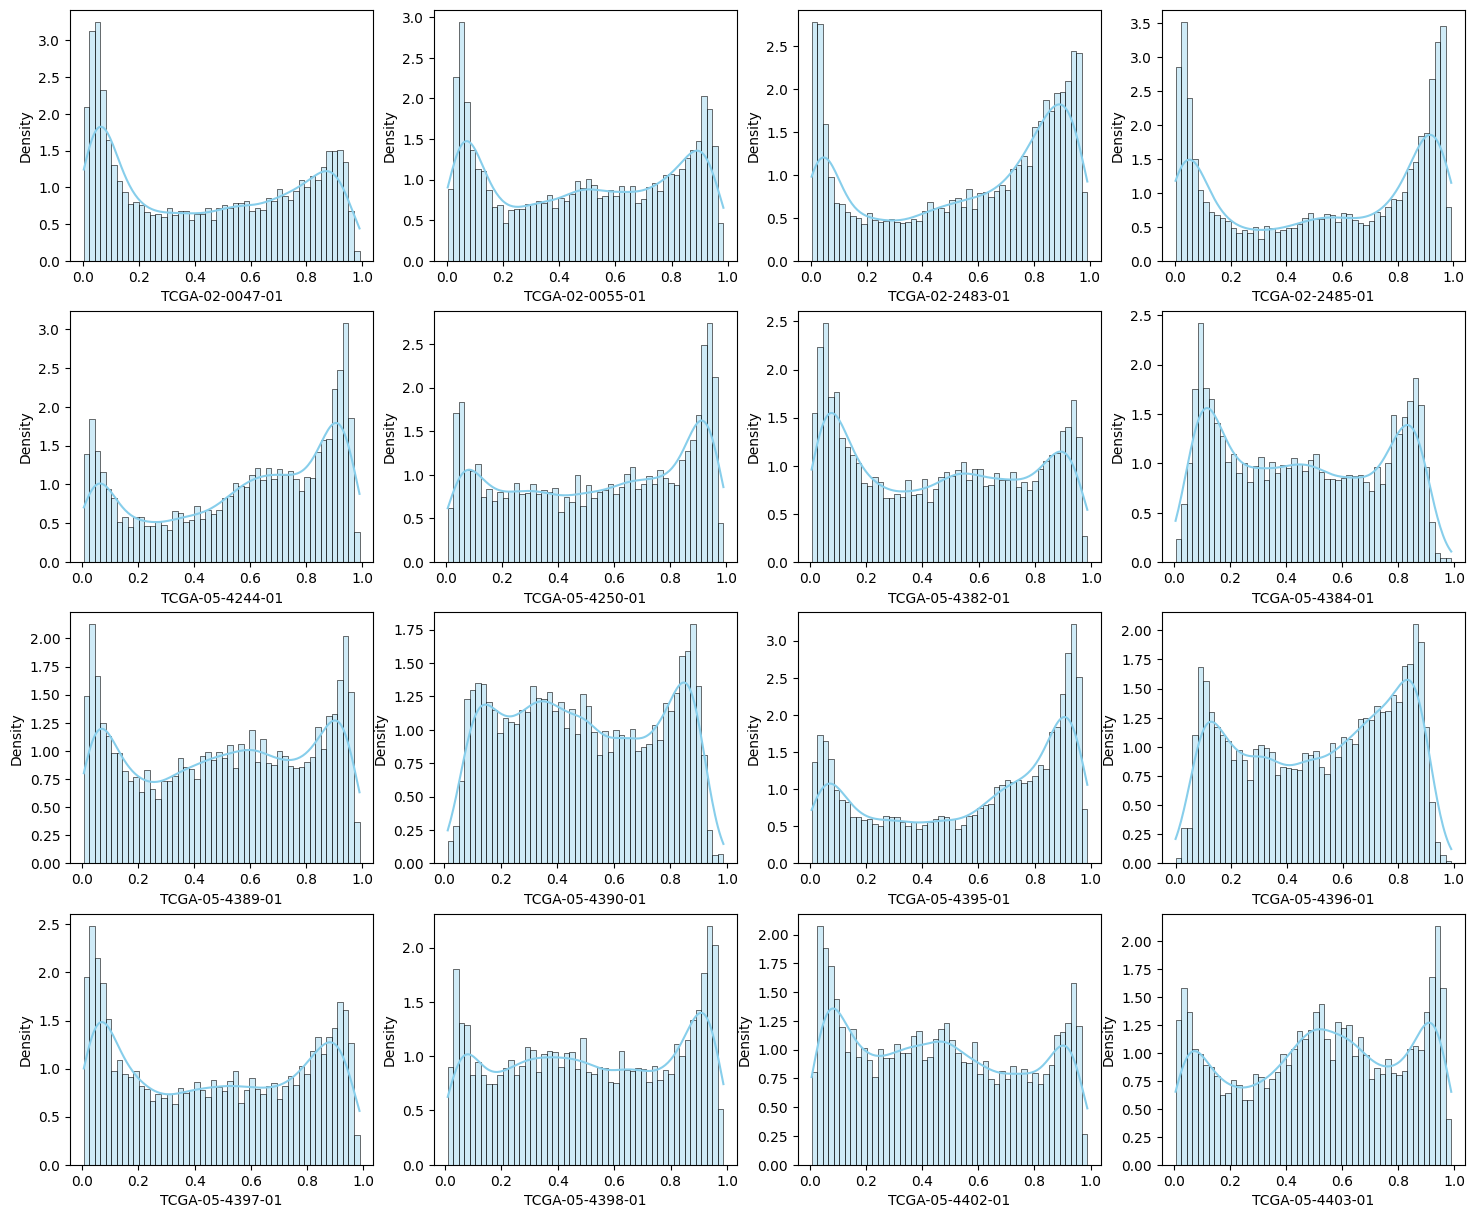

In [ ]:
# Looking for Distribution of cols

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat': 'density',
    'bins':n_bins
}
cols=df_subset.columns
fig, ax = plt.subplots(4,4, figsize=(18, 15))
ax = ax.flatten()

for i, column in enumerate(cols):
    sns.histplot(
        df_subset[column], label='Train',
        ax=ax[i], color='skyblue', **histplot_hyperparams
    )

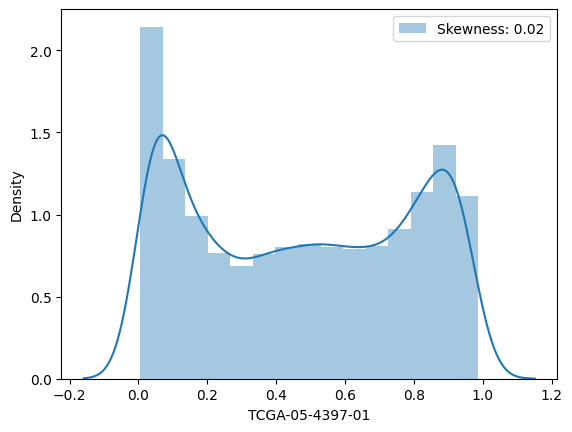

In [ ]:
t=sns.distplot(df["TCGA-05-4397-01"],label="Skewness: %.2f"%(df["TCGA-05-4397-01"].skew()) )
t.legend()

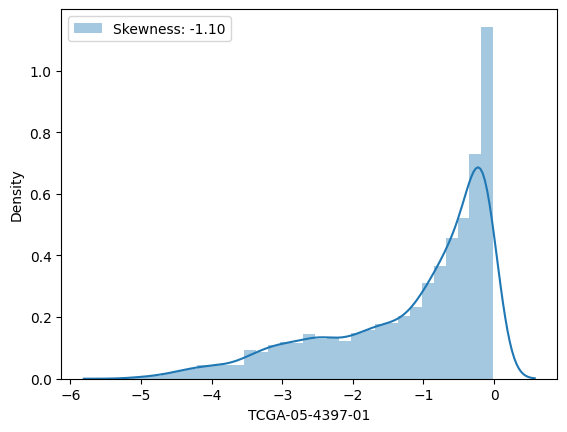

In [ ]:
# after log-transform
Log_Ave = df["TCGA-05-4397-01"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Ave,label="Skewness: %.2f"%(Log_Ave.skew()) )
t.legend()

**Mutation**

In [ ]:
df_mut = load_data("/content/drive/MyDrive/Colab Notebooks/Thesis/data/tcga_mut_data_paired_with_ccl.txt")


In [ ]:
df_mut.shape

(4539, 8239)

In [ ]:
df_mut.head()

,Gene,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-05-4244-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
0,A1CF,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A2ML1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AARS2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AASDH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking Null Values
df_mut.isnull().sum()

,0
Gene,0
TCGA-02-0047-01,0
TCGA-02-0055-01,0
TCGA-02-2483-01,0
TCGA-02-2485-01,0
TCGA-05-4244-01,0
TCGA-05-4250-01,0
TCGA-05-4382-01,0
TCGA-05-4384-01,0
TCGA-05-4389-01,0


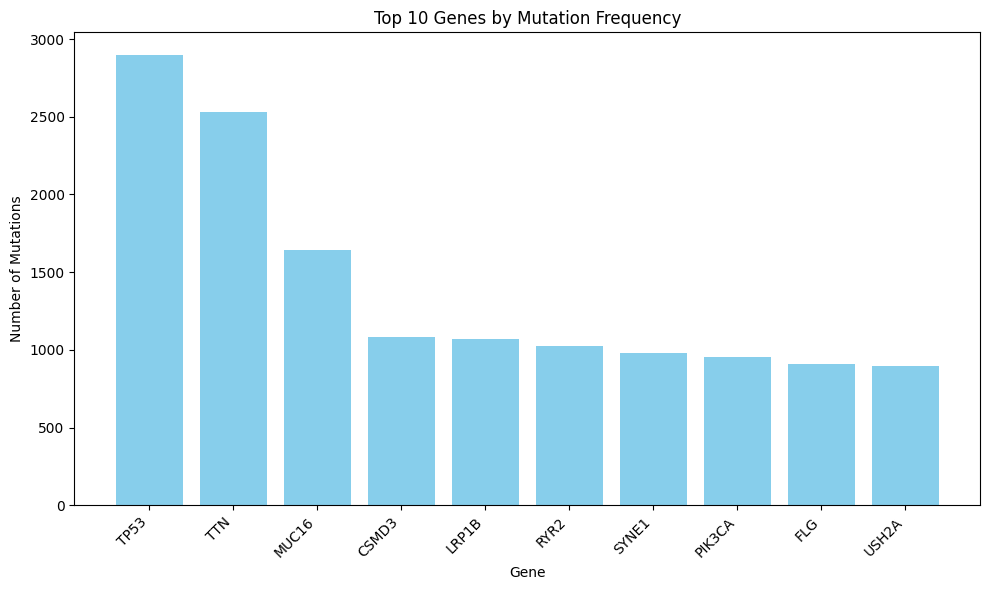

In [ ]:
df_mut['Mutation Count'] = df_mut.iloc[:, 1:].sum(axis=1)

top_genes = df_mut.nlargest(10, 'Mutation Count')

# Ploting the top 10 genes by mutation count
plt.figure(figsize=(10, 6))
plt.bar(top_genes['Gene'], top_genes['Mutation Count'], color='skyblue')
plt.title('Top 10 Genes by Mutation Frequency')
plt.xlabel('Genes')
plt.ylabel('Number of Mutations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Copy Number**



In [ ]:
df_cna = load_data("/content/drive/MyDrive/Colab Notebooks/Thesis/data/tcga_cna_data_paired_with_ccl.txt")


In [ ]:
df_cna.shape

(7460, 8239)

In [ ]:
df_cna.head()

,CNA,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-05-4244-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
0,128843_chr7_5473to5474_10k,0.0175,0.238,0.0941,1.7058,-0.1345,0.1948,0.1522,-0.0099,0.1005,...,-0.0436,2.9155,0.04,-0.0183,0.1267,0.137,-0.0317,0.007,-0.0631,-0.0084
1,128844_chr7_5474to5475_10k,0.0175,0.238,0.0941,1.7058,-0.1345,0.1948,0.1522,-0.0099,0.1005,...,-0.0436,2.9155,0.04,-0.0183,0.1267,0.137,-0.0317,0.007,-0.0631,-0.0084
2,128845_chr7_5475to5476_10k,0.0175,0.238,0.0941,1.7058,-0.1345,0.1948,0.1522,-0.0099,0.1005,...,-0.0436,2.9155,0.04,-0.0183,0.1267,0.137,-0.0317,0.007,-0.0631,-0.0084
3,128846_chr7_5476to5477_10k,0.0175,0.238,0.0941,1.7058,-0.1345,0.1948,0.1522,-0.0099,0.1005,...,-0.0436,2.9155,0.04,-0.0183,0.1267,0.137,-0.0317,0.007,-0.0631,-0.0084
4,128847_chr7_5477to5478_10k,0.0175,0.238,0.0941,1.7058,-0.1345,0.1948,0.1522,-0.0099,0.1005,...,-0.0436,2.9155,0.04,-0.0183,0.1267,0.137,-0.0317,0.007,-0.0631,-0.0084


**Distribution of CNA Values**

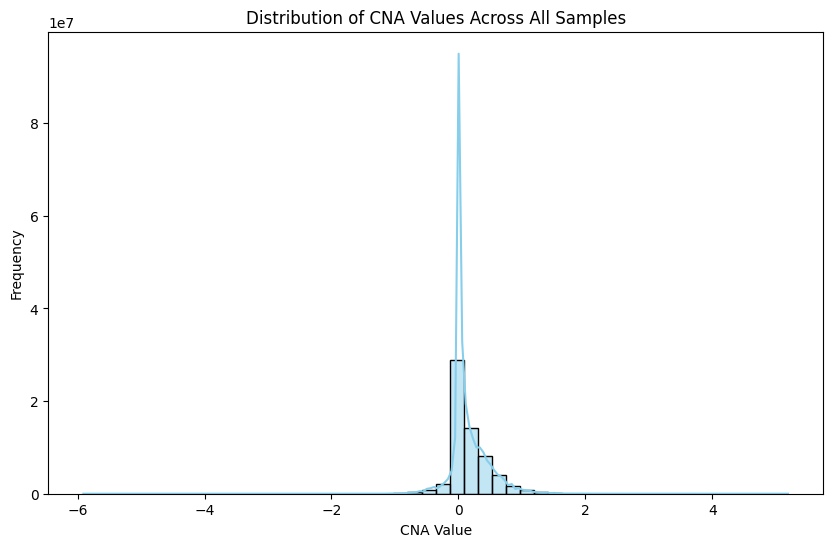

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cna.iloc[:, 1:].values.flatten(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of CNA Values Across All Samples')
plt.xlabel('CNA Value')
plt.ylabel('Frequency')
plt.show()


**Top Altered Genomic Regions**

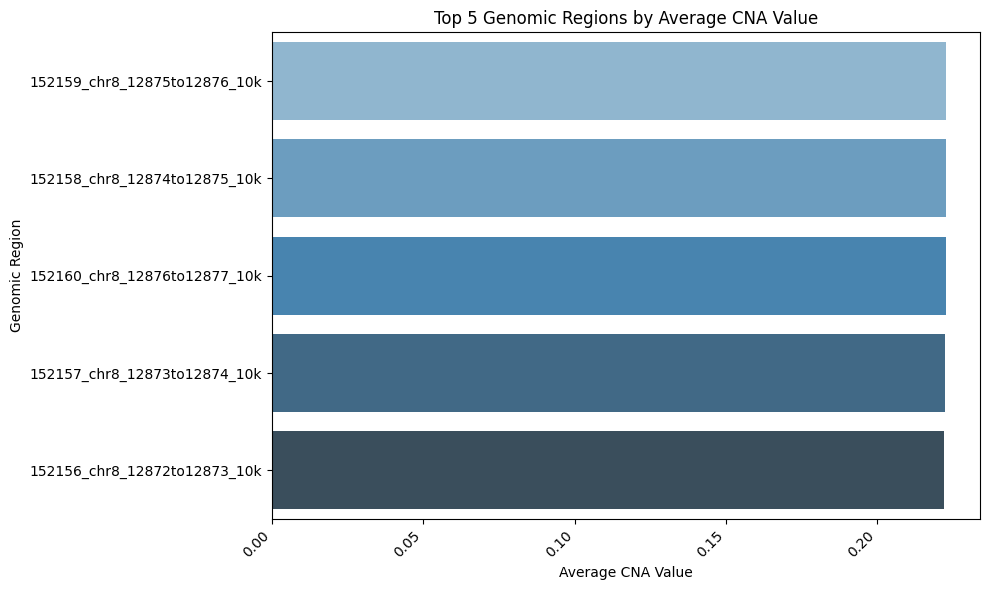

In [ ]:

df_cna['Average CNA'] = df_cna.iloc[:, 1:].mean(axis=1)

top_regions = df_cna.nlargest(5, 'Average CNA')

# Ploting the top 5 regions by average CNA value
plt.figure(figsize=(10, 6))
sns.barplot(x=top_regions['Average CNA'], y=top_regions['CNA'], palette='Blues_d')
plt.title('Top 5 Genomic Regions by Average CNA Value')
plt.xlabel('Average CNA Value')
plt.ylabel('Genomic Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Gene Expression**

In [7]:
df_exp = load_data("/content/drive/MyDrive/Colab Notebooks/Thesis/data/tcga_exp_data_paired_with_ccl.txt")


In [ ]:
df_exp.shape

(6016, 8239)

In [ ]:
df_exp.head()

,Gene,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-05-4244-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
0,A1BG,4.8385,6.0860,5.6206,3.6218,1.7269,3.4276,4.5807,4.6554,3.5656,...,10.4178,3.0018,3.7571,11.1524,11.8934,8.9495,9.1479,7.6498,3.7137,3.7082
1,A2M,9.0912,8.9723,8.1177,6.9676,7.0196,7.8080,8.0603,9.3786,6.5260,...,5.8953,7.8560,8.2043,9.2411,6.9706,8.0535,6.2920,8.3502,6.9593,6.8478
2,A2ML1,1.0636,0.0842,0.1112,2.3618,0.0000,0.0000,0.1636,0.0000,0.7050,...,0.0000,0.0567,0.6691,0.0000,0.0000,0.0145,0.0000,0.0000,0.0000,5.7437
3,A4GALT,1.3392,3.9570,1.9184,2.8659,2.4383,3.8074,4.2296,2.7613,3.8217,...,0.9782,4.3255,3.7082,3.6724,0.6324,3.4074,2.4195,2.0462,4.4502,4.9146
4,AADAT,3.4019,1.8400,3.2403,3.0756,1.3449,1.8719,1.1310,2.2810,1.8440,...,3.1969,0.8320,2.1635,1.1571,2.2203,4.1969,1.2266,0.2142,1.8400,1.3618


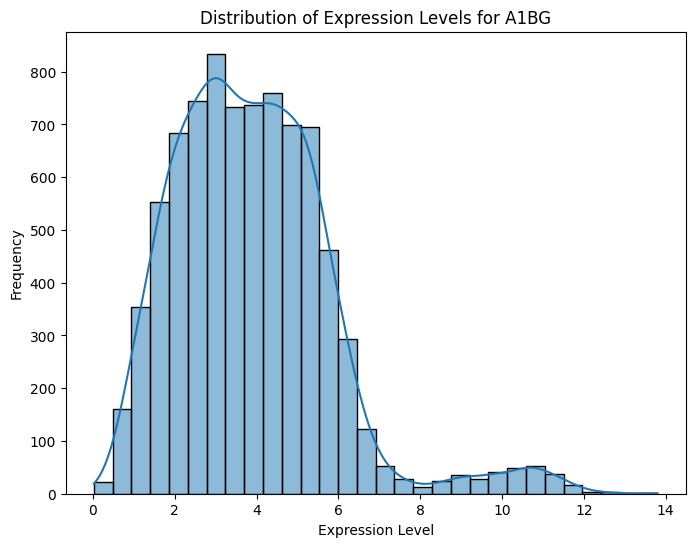

In [ ]:
# Histogram for a specific gene
gene_name = 'A1BG'
plt.figure(figsize=(8, 6))
sns.histplot(df_exp.loc[df_exp['Gene'] == gene_name].values.flatten()[1:], bins=30, kde=True)
plt.title(f'Distribution of Expression Levels for {gene_name}')
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.show()

In [19]:
df_exp_drop = df_exp.copy()

In [20]:
df_exp_drop.drop('Gene', axis = 1)

,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-05-4244-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
0,4.8385,6.0860,5.6206,3.6218,1.7269,3.4276,4.5807,4.6554,3.5656,4.8560,...,10.4178,3.0018,3.7571,11.1524,11.8934,8.9495,9.1479,7.6498,3.7137,3.7082
1,9.0912,8.9723,8.1177,6.9676,7.0196,7.8080,8.0603,9.3786,6.5260,7.4520,...,5.8953,7.8560,8.2043,9.2411,6.9706,8.0535,6.2920,8.3502,6.9593,6.8478
2,1.0636,0.0842,0.1112,2.3618,0.0000,0.0000,0.1636,0.0000,0.7050,0.0567,...,0.0000,0.0567,0.6691,0.0000,0.0000,0.0145,0.0000,0.0000,0.0000,5.7437
3,1.3392,3.9570,1.9184,2.8659,2.4383,3.8074,4.2296,2.7613,3.8217,4.6713,...,0.9782,4.3255,3.7082,3.6724,0.6324,3.4074,2.4195,2.0462,4.4502,4.9146
4,3.4019,1.8400,3.2403,3.0756,1.3449,1.8719,1.1310,2.2810,1.8440,3.1392,...,3.1969,0.8320,2.1635,1.1571,2.2203,4.1969,1.2266,0.2142,1.8400,1.3618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,2.2111,2.6848,3.7005,3.8380,1.5008,1.2870,3.2615,0.9412,0.6961,2.5753,...,0.3897,1.6960,0.9782,0.1507,0.1507,0.9261,0.0705,1.7312,2.6159,1.4006
6012,0.9412,2.2780,2.5336,2.4383,3.3744,4.6293,3.4437,4.2735,3.4209,2.2898,...,0.0977,2.5460,2.9430,2.0636,1.3562,1.2266,0.2870,5.4614,2.6439,4.2750
6013,6.6683,5.0824,6.0444,7.1698,2.0976,2.1796,4.3764,3.7225,4.2698,2.6599,...,4.3442,2.4957,2.8360,2.0976,0.9108,3.9580,3.6588,4.2342,4.8042,3.8022
6014,2.5008,3.0479,1.9411,2.9800,3.9928,2.5435,3.2188,3.9607,4.5053,1.8679,...,0.9929,0.8400,1.6554,1.5161,3.5766,2.1506,3.3089,1.5898,0.8561,2.7159


In [38]:
df_subset = df_exp_drop.iloc[:5000, :10]

In [39]:
df_subset.shape

(5000, 10)

In [48]:
# Converting all columns to numeric, forcing errors to NaN
df_subset_numeric = pd.DataFrame(df_subset).apply(pd.to_numeric, errors='coerce')


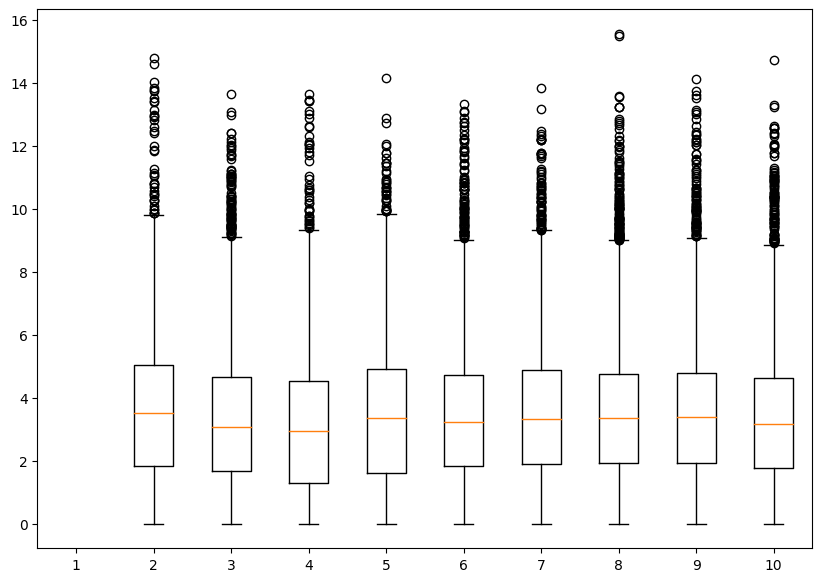

In [49]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(df_subset_numeric)

# show plot
plt.show()

In [52]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_subset_numeric['TCGA-02-0047-01']))

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_subset_numeric.drop(outlier_indices)
print("Original DataFrame Shape:", df_subset_numeric.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (5000, 10)
DataFrame Shape after Removing Outliers: (4858, 10)


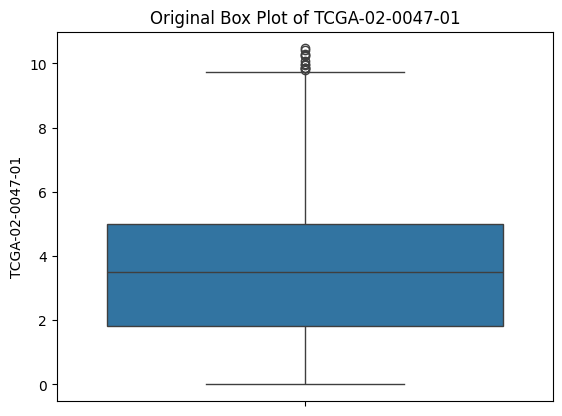

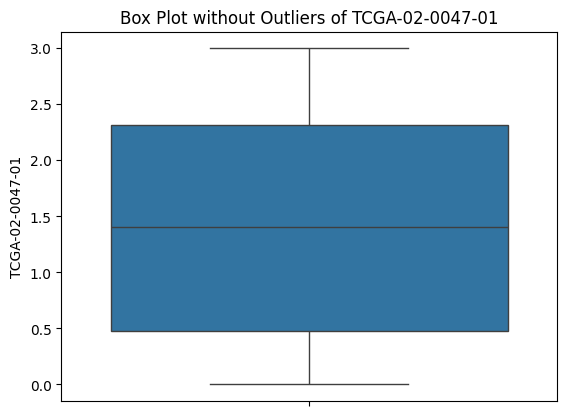

In [65]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, column, threshold):
    # Original Box Plot
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    # Removing outliers
    removed_outliers = df[df[column] <= threshold]

    # Box Plot without outliers
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

# Calculating Z-Scores
z_scores = np.abs(stats.zscore(df_subset_numeric[['TCGA-02-0047-01']]))
threshold_value = 3  
filtered_df = df_subset_numeric[z_scores < threshold_value]

no_outliers = removal_box_plot(filtered_df, 'TCGA-02-0047-01', threshold_value)


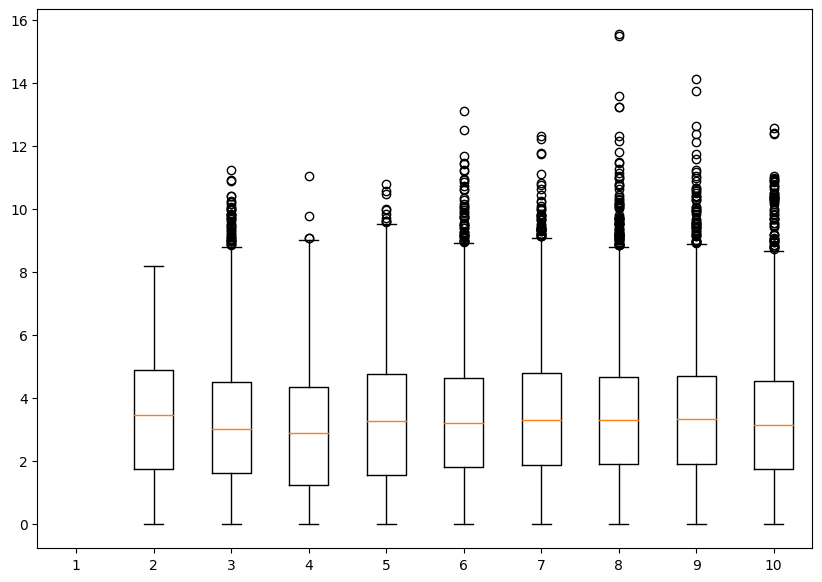

In [53]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(no_outliers)

plt.show()

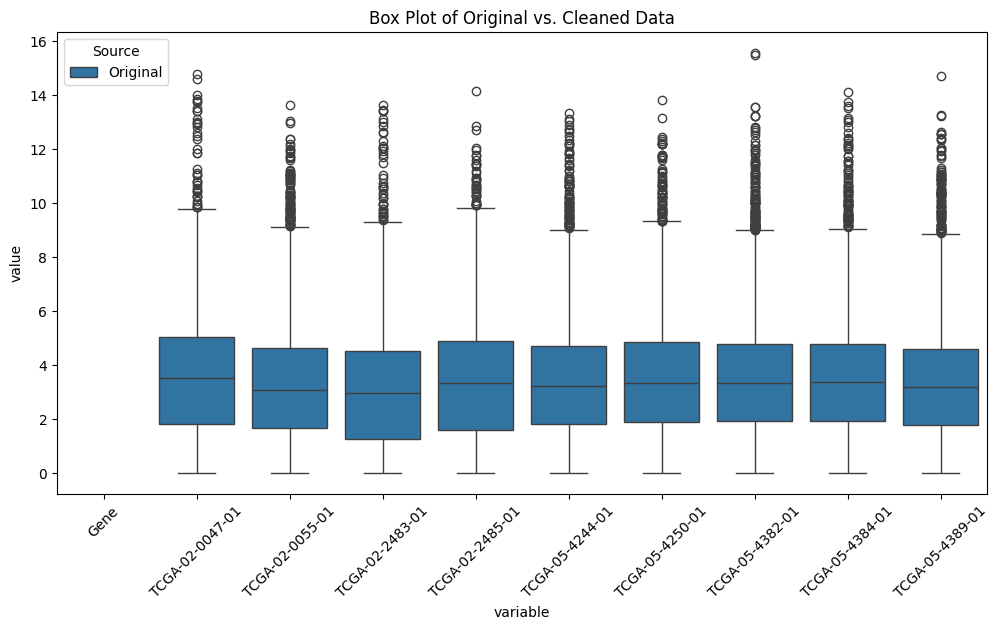

In [44]:
import seaborn as sns

df_exp_numeric['Source'] = 'Original'
data_cleaned['Source'] = 'Cleaned'

# Melt data for seaborn
df_combined = pd.concat([df_exp_numeric, data_cleaned], axis=0)
df_melted = df_combined.melt(id_vars='Source')

# Plot box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='Source', data=df_melted)
plt.title('Box Plot of Original vs. Cleaned Data')
plt.xticks(rotation=45)
plt.show()

In [25]:
data_gene.head()

,Gene,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-05-4244-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
0,A1BG,4.8385,6.086,5.6206,3.6218,1.7269,3.4276,4.5807,4.6554,3.5656,...,10.4178,3.0018,3.7571,11.1524,11.8934,8.9495,9.1479,7.6498,3.7137,3.7082


In [68]:
df_exp_numeric = df_exp2.apply(pd.to_numeric, errors='coerce')


In [69]:
#data noramlization
df_exp_numeric_scaled = (df_exp_numeric - df_exp_numeric.min()) / (df_exp_numeric.max() - df_exp_numeric.min())


In [70]:
df_exp_numeric_long = df_exp_numeric.melt(var_name='Variable', value_name='Original')
df_exp_numeric_scaled_long = df_exp_numeric_scaled.melt(var_name='Variable', value_name='Normalized')

**Top Expressed Genes**

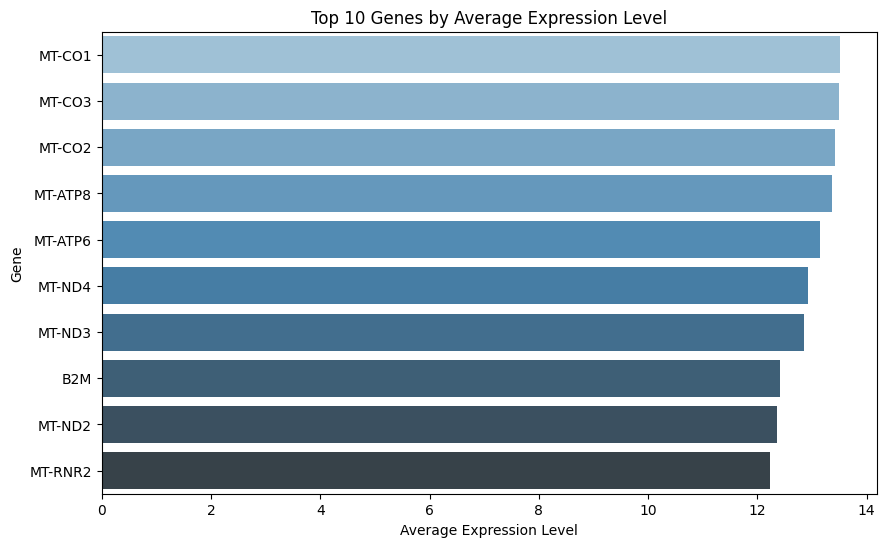

In [ ]:
df_exp['Average Expression'] = df_exp.iloc[:, 1:].mean(axis=1)
top_genes = df_exp.nlargest(10, 'Average Expression')

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genes['Average Expression'], y=top_genes['Gene'], palette='Blues_d')
plt.title('Top 10 Genes by Average Expression Level')
plt.xlabel('Average Expression Level')
plt.ylabel('Gene')
plt.show()

**Correlation Analysis**

In [ ]:
correlationMatrix = df_exp.iloc[:, 1:].T.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlationMatrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Gene Expressions')
plt.xlabel('Genes')
plt.ylabel('Genes')
plt.show()

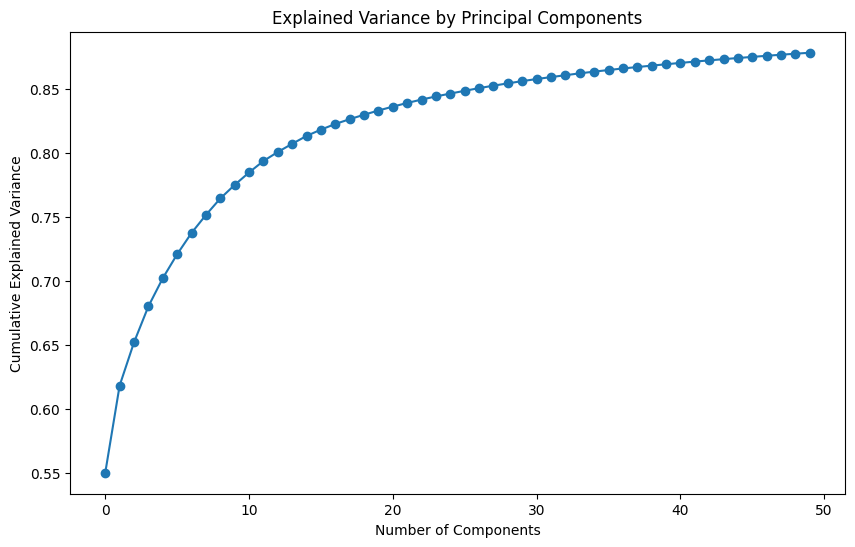

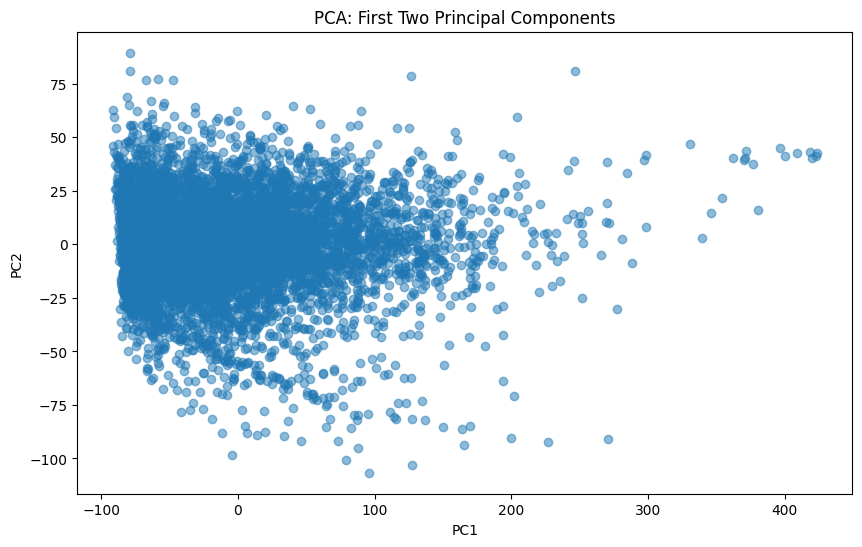

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_exp.iloc[:, 1:].values)  

n_components = 50  
ipca = IncrementalPCA(n_components=n_components)
X_pca = ipca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(ipca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.show()


In [ ]:
def load_data():
    with open('/content/drive/MyDrive/Colab Notebooks/Thesis/data/ccl_complete_data_28CCL_1298DepOI_36344samples_demo.pickle', 'rb') as f:
        data_mut, data_exp, data_cna, data_meth, data_dep, data_fprint = pickle.load(f)

    premodel_mut = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Thesis/data/premodel_tcga_mut_1000_100_50.pickle', 'rb'))
    premodel_exp = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Thesis/data/premodel_tcga_exp_500_200_50.pickle', 'rb'))
    premodel_cna = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Thesis/data/premodel_tcga_cna_500_200_50.pickle', 'rb'))
    premodel_meth = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Thesis/data/premodel_tcga_meth_500_200_50.pickle', 'rb'))
    print("\n\nDatasets successfully loaded.")
    return data_mut, data_exp, data_cna, data_meth, data_dep, data_fprint, premodel_mut, premodel_exp, premodel_cna, premodel_meth

In [ ]:
def preprocess_data(data_mut, num_DepOI):
    num_ccl = int(data_mut.shape[0] / num_DepOI)
    id_rand = np.random.permutation(num_ccl)
    id_cell_train = id_rand[np.arange(0, round(num_ccl * 0.9))]
    id_cell_test = id_rand[np.arange(round(num_ccl * 0.9), num_ccl)]

    id_train = np.arange(0, 1298) + id_cell_train[0] * 1298
    for y in id_cell_train:
        id_train = np.union1d(id_train, np.arange(0, 1298) + y * 1298)
    id_test = np.arange(0, 1298) + id_cell_test[0] * 1298
    for y in id_cell_test:
        id_test = np.union1d(id_test, np.arange(0, 1298) + y * 1298)
    print("\n\nTraining/validation on %d samples (%d CCLs x %d DepOIs) and testing on %d samples (%d CCLs x %d DepOIs).\n\n" % (
        len(id_train), len(id_cell_train), num_DepOI, len(id_test), len(id_cell_test), num_DepOI))
    return id_train, id_test

In [ ]:
def build_submodel(input_shape, premodel, layer_units, activation_func):
    model = models.Sequential()
    for units, weights in zip(layer_units, premodel):
        model.add(Dense(units=units, input_shape=input_shape, activation=activation_func, weights=weights, trainable=True))
        input_shape = (units,)
    return model

In [ ]:
def build_combined_model(data_fprint, premodel_mut, premodel_exp, premodel_cna, premodel_meth, activation_func, dense_layer_dim, init):
    input_mut = Input(shape=(premodel_mut[0][0].shape[0],))
    input_exp = Input(shape=(premodel_exp[0][0].shape[0],))
    input_cna = Input(shape=(premodel_cna[0][0].shape[0],))
    input_meth = Input(shape=(premodel_meth[0][0].shape[0],))
    input_gene = Input(shape=(data_fprint.shape[1],))

    model_mut = build_submodel((premodel_mut[0][0].shape[0],), premodel_mut, [1000, 100, 50], activation_func)
    model_exp = build_submodel((premodel_exp[0][0].shape[0],), premodel_exp, [500, 200, 50], activation_func)
    model_cna = build_submodel((premodel_cna[0][0].shape[0],), premodel_cna, [500, 200, 50], activation_func)
    model_meth = build_submodel((premodel_meth[0][0].shape[0],), premodel_meth, [500, 200, 50], activation_func)

    model_gene = models.Sequential([
        Dense(units=1000, input_shape=(data_fprint.shape[1],), activation=activation_func, kernel_initializer=init, trainable=True),
        Dense(units=100, activation=activation_func, kernel_initializer=init, trainable=True),
        Dense(units=50, activation=activation_func, kernel_initializer=init, trainable=True)
    ])

    combined = Concatenate()([model_mut(input_mut), model_exp(input_exp), model_cna(input_cna), model_meth(input_meth), model_gene(input_gene)])
    combined = Dense(units=dense_layer_dim, activation=activation_func, kernel_initializer=init)(combined)
    combined = Dense(units=dense_layer_dim, activation=activation_func, kernel_initializer=init)(combined)
    output = Dense(units=1, activation='linear', kernel_initializer=init)(combined)

    model_final = models.Model(inputs=[input_mut, input_exp, input_cna, input_meth, input_gene], outputs=output)
    return model_final

In [ ]:
def train_model(model, data_mut, data_exp, data_cna, data_meth, data_fprint, data_dep, id_train, num_epoch, batch_size):
    history = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='min')
    model.compile(loss='mse', optimizer='adam')
    model.fit(
        [data_mut[id_train], data_exp[id_train], data_cna[id_train], data_meth[id_train], data_fprint[id_train]],
        data_dep[id_train], epochs=num_epoch, validation_split=1/9, batch_size=batch_size, shuffle=True,
        callbacks=[history])
    return history

In [ ]:
def evaluate_model(model, data_mut, data_exp, data_cna, data_meth, data_fprint, data_dep, id_test, batch_size):
    cost_testing = model.evaluate(
        [data_mut[id_test], data_exp[id_test], data_cna[id_test], data_meth[id_test], data_fprint[id_test]],
        data_dep[id_test], verbose=0, batch_size=batch_size)
    return cost_testing

In [ ]:
def save_model(model, path):
    model.save(path)
    print("\n\nFull DeepDEP model saved in %s\n\n" % path)

In [ ]:
if __name__ == '__main__':
    check_gpu()
    data_mut, data_exp, data_cna, data_meth, data_dep, data_fprint, premodel_mut, premodel_exp, premodel_cna, premodel_meth = load_data()

    num_DepOI = 1298
    activation_func = 'relu'
    init = 'he_uniform'
    dense_layer_dim = 250
    batch_size = 50
    num_epoch = 10

    id_train, id_test = preprocess_data(data_mut, num_DepOI)

    t = time.time()
    model_final = build_combined_model(data_fprint, premodel_mut, premodel_exp, premodel_cna, premodel_meth, activation_func, dense_layer_dim, init)

    history = train_model(model_final, data_mut, data_exp, data_cna, data_meth, data_fprint, data_dep, id_train, num_epoch, batch_size)

    cost_testing = evaluate_model(model_final, data_mut, data_exp, data_cna, data_meth, data_fprint, data_dep, id_test, batch_size)
    print("\n\nFull DeepDEP model training completed in %.1f mins.\nloss:%.4f valloss:%.4f testloss:%.4f" % (
        (time.time() - t)/60, history.model.history['loss'][history.stopped_epoch],
        history.model.history['val_loss'][history.stopped_epoch], cost_testing))

    save_model(model_final, "/results/models/model_demo.h5")
